In [17]:
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pathlib import Path
import scipy
from scipy.io import loadmat
import sys

from evo_strat import evo_strat
from simulator import simulator, gen_vornoi_classes

In [18]:
###
# 1. LOAD DATA
# Put the X, Y positions and the classes into a dataframe 
###

sp = '/home/jbetterton/projects/adapt_illum_2/AdaptiveIllum_RL'
path177 = Path(sp) / 'positions' / '177.csv'
locdf = pd.read_csv(path177)
locdf = locdf.rename(columns={'Plate Y': 'Y', 'Plate X': 'X'}) 
locdf['class'] = gen_vornoi_classes(locdf['X'], locdf['Y'], 5)[0]

In [19]:
###
# 2. LOAD MODEL
# provided are the neural net in models/nn_weights.npy and 
# a linear model in models/lin_weights.npy
###

model = np.load("models/exper1_w_bound_nn.npy")

In [20]:
###
# 3. SIMULATOR SETTINGS ARGUMENTS
###

args = {}
args["nn"] = True # true if neural net, false if linear model
args["n_classes"] = 5 # number of classes
args["cell_size"] = 4.5 # the distance between measurement positions in the data

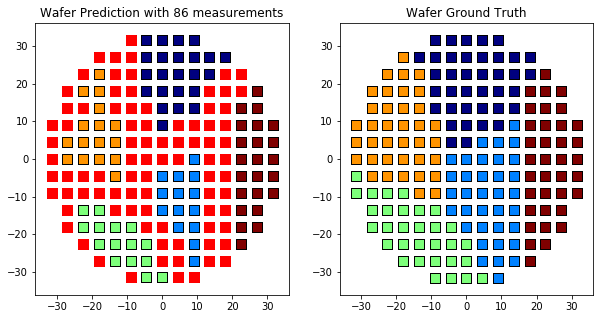

Measured Indices


In [21]:
###
# 4. RUN SIMULATION
# return a 2D array of the positions measurerd in order of when they were measured
# set visual to true if you want to see plots
# set plot_all to true to see a plot for every time step
###
ordered_measurements = simulator(model, args=args, visual=True, plot_all=False, data=locdf)

In [6]:
###
# 5. SAVE RESULTS
###
save_file = "model_test_result.npy"
np.save(save_file, ordered_measurements)

In [30]:
###
# (Optional) VIEW TRAINING RESULTS
###
n_trials = 200
total_reward = 0
for i in range(n_trials):
    # print progress bar
    out_str = str(i + 1) +  "/" + str(n_trials)
    sys.stdout.write("\r" + out_str)
    sys.stdout.flush()
    # test model 
    _, reward = simulator(model, args=args, visual=False, plot_all=False, data=None)
    total_reward += reward
print("\r Average reward is {}".format(total_reward / n_trials))

 Average reward is -90.63
